# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

C:\Users\zoria\miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase = pd.read_csv(data_path, delimiter = ',')
print(f"Data instances: {len(spambase.index)}")
print(f"Data attriutes: {len(spambase.columns)}")
print(f"Data target: {len(spambase[spambase.is_spam==0])} negative, {len(spambase[spambase.is_spam==1])} positive")
spambase.head(5)

Data instances: 4601
Data attriutes: 55
Data target: 2788 negative, 1813 positive


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [3]:
# Your Code goes here:
X = spambase.drop('is_spam', axis=1).values
y = spambase['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

***Your answer goes here:***  
We need to set random_state = 0

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [4]:
# Your Code goes here:
model = LogisticRegression(solver='lbfgs') # Broyden–Fletcher–Goldfarb–Shanno optimisation algorithm
model.fit(X = X_train, y = y_train)

predictions_train = model.predict(X = X_train)
predictions_test = model.predict(X = X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=predictions_train)
acc_test = accuracy_score(y_true=y_test, y_pred=predictions_test)

print(f"Train accuracy: {acc_train}")
print(f"Test accuracy: {acc_test}")

Train accuracy: 0.9350241545893719
Test accuracy: 0.928416485900217


***Your answer goes here:***  
The model predictions on the test data are of almost the same accuracy as the train data predictions. This means that the model generalises well for unseen data.

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [5]:
# Your Code goes here:
idx_hp = spambase.columns.get_loc("word_freq_hp_binarized")
idx_dollar = spambase.columns.get_loc("char_freq_$_binarized")
hp_coef = model.coef_[0,idx_hp]
dollar_coef = model.coef_[0,idx_dollar]
print(f"hp coeff: {hp_coef}")
print(f"dollar coeff: {dollar_coef}")
print(f"ph_coeff/dolar_coeff = {hp_coef/dollar_coef}")

hp coeff: -2.639347200187697
dollar coeff: 1.698642733252472
ph_coeff/dolar_coeff = -1.5537977165651622


***Your answer goes here:***  
An instance is considered no-spam if dot(x,w)<0, therefore the value of the sigmoid is <0.5. Then negative coefficients would directly make the dot product smaller and are associated with non-spam emails.  
In this sense, hp appears in non-spam, while $ is seen in spam emails.

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [6]:
# Your Code goes here:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

svm_acc_train = accuracy_score(y_true=y_train, y_pred=svm_pred_train)
svm_acc_test = accuracy_score(y_true=y_test, y_pred=svm_pred_test)

print(f"Train accuracy: {svm_acc_train}")
print(f"Test accuracy: {svm_acc_test}")

Train accuracy: 0.9345410628019324
Test accuracy: 0.9197396963123644


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [7]:
# Your Code goes here:
hp_coef = svm_model.coef_[0,idx_hp]
dollar_coef = svm_model.coef_[0,idx_dollar]
print(f"hp coeff: {hp_coef}")
print(f"dollar coeff: {dollar_coef}")
print(f"ph_coeff/dolar_coeff = {hp_coef/dollar_coef}")

hp coeff: -0.8567709807292775
dollar coeff: 0.5693539868998415
ph_coeff/dolar_coeff = -1.5048124724557295


***Your answer goes here:***  
The coefficients are scaled down. However, their ratio is really similar, which means they carry similar importance in a classification with either of the two models.

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

***Your answer goes here:***  
Both models are discriminative - they directly model the decision boundary unlike a generative model, which models the distribution for each class and calculates p(y|x) based on p(x|y).

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [8]:
# Your Code goes here:

l = ["Gaussian", "Polynomial"]

for idx, kernel in enumerate(['rbf', 'poly']):
    kernel_model = SVC(kernel=kernel)
    kernel_model.fit(X_train, y_train)

    kernel_pred_train = kernel_model.predict(X_train)
    kernel_pred_test = kernel_model.predict(X_test)

    kernel_acc_train = accuracy_score(y_true=y_train, y_pred=kernel_pred_train)
    kernel_acc_test = accuracy_score(y_true=y_test, y_pred=kernel_pred_test)

    print(f"----- {l[idx]} SVM -----")
    print(f"Train accuracy: {kernel_acc_train}")
    print(f"Test accuracy: {kernel_acc_test} \n")


----- Gaussian SVM -----
Train accuracy: 0.9342995169082126
Test accuracy: 0.93058568329718 

----- Polynomial SVM -----
Train accuracy: 0.8002415458937198
Test accuracy: 0.8091106290672451 



***Your answer goes here:***  
The kernelised Gaussian classifier using Radial basis functions gives the highest accuracy both on training and testing data. Test accuracy is insignificantly lower than train accuracy - the model generalises unseen dtaa well.

The classifier using a polynomial kernel generalises well, but performs with a lower accuracy on both test and train data compared to the non-kernalised SVM classifier.

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [9]:
# Load Splice Train Here
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path, delimiter = ',')

pd.unique(splice_train[splice_train.columns].values.ravel('K'))

array(['T', 'G', 'C', 'A', 'D', 'N', 'R', 'S', 'EI', 'IE'], dtype=object)

In [10]:
# Load Splice Test Here
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path, delimiter = ',')

pd.unique(splice_test[splice_test.columns].values.ravel('K'))

array(['C', 'A', 'G', 'T', 'IE', 'N', 'EI'], dtype=object)

### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [11]:
# Your Code goes here:

# Train data preprocessing
processed_splice_train = splice_train[splice_train.columns].astype('category')
y_train = processed_splice_train['class']
processed_splice_train = pd.get_dummies(processed_splice_train.drop('class', axis=1))

X_train = processed_splice_train.values

#Test data preprocessing
processed_splice_test = splice_test[splice_test.columns].astype('category')
y_test = processed_splice_test['class']
processed_splice_test = pd.get_dummies(processed_splice_test.drop('class', axis=1))
for col in processed_splice_train.columns:
    if not(col in processed_splice_test.columns):
        processed_splice_test.loc[:, col] = 0

# reorder test dataframe columns
processed_splice_test = processed_splice_test[processed_splice_train.columns]
# Checks if the column order in test data and train data is the same
# print(all(processed_splice_train.columns == processed_splice_test.columns))
X_test = processed_splice_test.values

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [12]:
# Your Code goes here:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (2935, 287)
y_train: (2935,)
X_test: (255, 287)
y_test: (255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [13]:
# Your Code goes here:

NN1 = KNeighborsClassifier(n_neighbors=1)
NN1.fit(X_train, y_train)

pred_train = NN1.predict(X_train)
acc_train = accuracy_score(y_true=y_train, y_pred=pred_train)
print(f"Train accuracy: {acc_train}")

Train accuracy: 0.9996592844974447


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***Your answer goes here:***  
Testing the 1NN model on the training data will give us extremely high accurcacy (actually 100%) because the closest neighbour to each point when testing will be the exact same point in the training set (their distance from each other will be 0), thus clasifying it correctly.  
However, the classifier would not generalise this well on unseen data as the new data points will not completely coincide with the training datapoints.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [14]:
# Your Code goes here:

pred_test = NN1.predict(X_test)
acc_test = accuracy_score(y_true=y_test, y_pred=pred_test)
print(f"Test accuracy: {acc_test}")

Test accuracy: 0.7490196078431373


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

Text(0.5,1,'Test data class distribution')

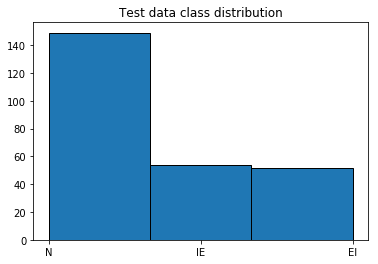

In [15]:
plt.hist(x=splice_test['class'].value_counts().index.values.reshape(-1,1), weights=splice_test['class'].value_counts().values.reshape(-1,1), bins=3, ec = 'k')
plt.title('Test data class distribution')

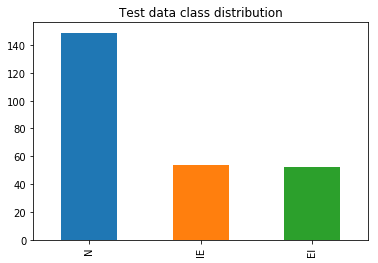

In [16]:
splice_test['class'].value_counts().plot.bar(title="Test data class distribution")

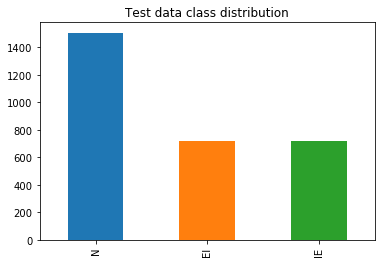

In [17]:
splice_train['class'].value_counts().plot.bar(title="Test data class distribution")

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [18]:
# Your Code goes here:

pred_dummy_test = np.array(['N']*255, dtype=object)
acc_dummy_test = accuracy_score(y_true=y_test, y_pred=pred_dummy_test)
print(f"Test accuracy: {acc_dummy_test}")

Test accuracy: 0.5843137254901961


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [19]:
# Your Code goes here:
k_vals = [5,10,50,100,200,500,1000,1500,2000]

kNN_models = {
    "k_vals":k_vals,
    "models": [],
    "train_pred": [],
    "test_pred": [],
    "train_acc": [],
    "test_acc":[]
}

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)

    # Fitting the model
    model.fit(X=X_train, y=y_train)
    kNN_models["models"].append(model)

    # Testing on training data
    pred_train = model.predict(X_train)
    kNN_models['train_pred'].append(pred_train)

    acc_train = accuracy_score(y_true=y_train, y_pred=pred_train)
    kNN_models['train_acc'].append(acc_train)

    # Testing on testing data
    pred_test = model.predict(X_test)
    kNN_models['test_pred'].append(pred_test)

    acc_test = accuracy_score(y_true=y_test, y_pred=pred_test)
    kNN_models['test_acc'].append(acc_test)

    print(f"k={k}")
    print(f"Train acc: {acc_train}")
    print(f"Test acc: {acc_test} \n")

k=5
Train acc: 0.8633730834752982
Test acc: 0.7843137254901961 

k=10
Train acc: 0.8551959114139693
Test acc: 0.8156862745098039 

k=50
Train acc: 0.8848381601362862
Test acc: 0.8666666666666667 

k=100
Train acc: 0.9011925042589438
Test acc: 0.8901960784313725 

k=200
Train acc: 0.9182282793867121
Test acc: 0.8862745098039215 

k=500
Train acc: 0.937649063032368
Test acc: 0.9411764705882353 

k=1000
Train acc: 0.909710391822828
Test acc: 0.9568627450980393 

k=1500
Train acc: 0.6514480408858603
Test acc: 0.6980392156862745 

k=2000
Train acc: 0.5131175468483816
Test acc: 0.5843137254901961 



In [20]:
print(y_train.shape)
print(y_test.shape)

(2935,)
(255,)


***Your answer goes here:***  
1. The models with k=100, 200, 500, 1000 perform really well on the training dataset (accuracy > 90%)  
2. When k=500, 1000, the model has a higher accuracy on unseen data, compared to training data. The models generalise well on new unseen data points.  
3. As k increases further, the accuracy falls drastically. For k=2000, too many neighbours are considered when making the classification and the predicted class ends up being the one we which has the highest class probability ('N') - the most common class in the training data. Therefore, for k=2000 the model performs just like the dummy model, which always classifies the points as 'N'.


### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

[0.7843137254901961,
 0.8156862745098039,
 0.8666666666666667,
 0.8901960784313725,
 0.8862745098039215,
 0.9411764705882353,
 0.9568627450980393,
 0.6980392156862745,
 0.5843137254901961]

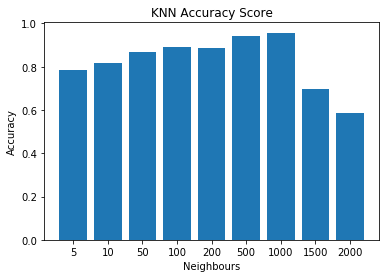

In [21]:
# Your Code goes here:
ticks = [i for i in range(len(k_vals))]
plt.bar(x=ticks, height=kNN_models['test_acc'])
plt.xticks(ticks,k_vals)
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Score')
kNN_models['test_acc']

***Your answer goes here:***  
We see that there is a middle ground where the models perform better on unseen data.  
This way we can try out different values for the hyperparameter k and determine which model performs best. (In this case our test dataset acts as a validation set).

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [22]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

array([[ 50,   2,   2],
       [  1, 148,   0],
       [  0,   6,  46]], dtype=int64)

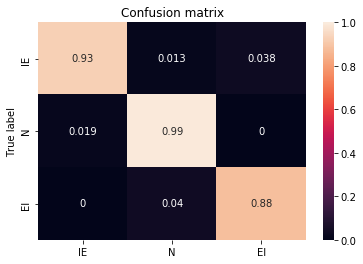

In [23]:
# Your Code goes here:
# k = 1000
cm = confusion_matrix(y_true=y_test, y_pred=kNN_models['test_pred'][6], labels=splice_test['class'].unique())
norm_cm = cm / np.sum(cm, axis=1)
plot_confusion_matrix(norm_cm, classes = splice_test['class'].unique())
cm

array([[43,  7,  4],
       [27, 97, 25],
       [ 1,  0, 51]], dtype=int64)

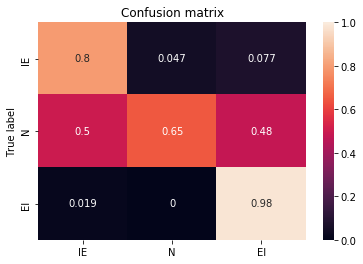

In [24]:
# k = 5
cm = confusion_matrix(y_true=y_test, y_pred=NN1.predict(X_test), labels=splice_test['class'].unique())
norm_cm = cm / np.sum(cm, axis=1)
plot_confusion_matrix(norm_cm, classes = splice_test['class'].unique())
cm

***Your answer goes here:***

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

In [25]:
# Calculating log_loss for each model
kNN_models['log_loss'] = []
for i in range(len(kNN_models['k_vals'])):
    log_loss_val = log_loss(y_true=y_test, y_pred=kNN_models['models'][i].predict_proba(X_test))
    kNN_models['log_loss'].append(log_loss_val)

[1.4909193996046313,
 0.489381019844735,
 0.5327181300756093,
 0.5583129505381812,
 0.6019532892756086,
 0.6715866647110698,
 0.7542935541745395,
 0.8177287055931994,
 0.8753647883393483]

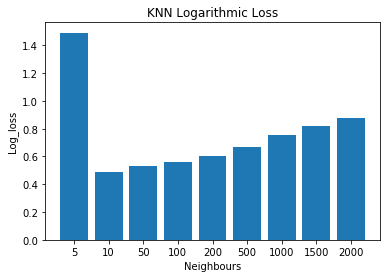

In [26]:
# Plotting bar plot
ticks = [i for i in range(len(k_vals))]
plt.bar(x=ticks, height=kNN_models['log_loss'])
plt.xticks(ticks,k_vals)
plt.xlabel('Neighbours')
plt.ylabel('Log_loss')
plt.title('KNN Logarithmic Loss')
kNN_models['log_loss']

***Your answer goes here:***  
The model with k=5 classifies the new datapoint with the highest certainty. 

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***Your answer goes here:***  
With the kNN classifier the most common class amongst the k neighbours is chosen (the mode). This can be considered as a probabilistic method - we pick the class with the highest probability amongst the neighbours.

A SVM Classifier is a discriminative method, where we do not estimate the probability of the datapoint belonging to each class, we directly find a decision bounary. In this sense, we cannot make use of the log_loss metric.